#1. What is Simple Linear Regression?

Simple Linear Regression is a statistical method used to model the relationship between two continuous variables: a dependent variable (the one you want to predict) and an independent variable (the one you use to predict). It assumes a linear relationship between these variables, meaning the relationship can be represented by a straight line. The goal is to find the best-fitting line that minimizes the difference between the observed values of the dependent variable and the values predicted by the line. This line is defined by two parameters: the slope and the y-intercept.

# 2. What are the key assumptions of Simple Linear Regression?

- For Simple Linear Regression to be a valid model for your data, several key assumptions should be met:

1.  Linearity: The relationship between the independent variable (X) and the dependent variable (Y) must be linear. This means the data points should roughly fall along a straight line.
2.  Independence of Errors: The errors (the differences between the observed values and the predicted values) should be independent of each other. This means the error for one data point should not be related to the error for any other data point.
3.  Homoscedasticity : The variance of the errors should be constant across all levels of the independent variable. This means the spread of the residuals should be roughly the same across the range of the independent variable.
4.  Normality of Errors: The errors should be approximately normally distributed. This means that if you plot the residuals, they should form a bell-shaped curve.
5.  No Multicollinearity: While more relevant in multiple linear regression, it's good to be aware that in simple linear regression, the independent variable should not be a perfect linear function of another independent variable (though this is not applicable with only one independent variable).



#3. What is heteroscedasticity, and why is it important to address in regression models?
- Heteroscedasticity occurs when the variance of the errors (residuals) in a regression model is not constant across all levels of the independent variable(s).If the variance of residuals is constant, it's called homoscedasticity (which is ideal).

* Why is it Important to Address?

1.Biased Standard Errors:
Heteroscedasticity doesn't bias the regression coefficients themselves, but it makes their standard errors unreliable.

2.Incorrect Significance Tests:
Because standard errors are wrong, your t-tests and F-tests may give false results — you might think a variable is significant when it's not (or vice versa).

3.Less Efficient Estimates:
The Ordinary Least Squares (OLS) method assumes equal variance of residuals. When this is violated, the model becomes less efficient, meaning it doesn't provide the best possible estimates.

4.Model Misinterpretation:
Ignoring heteroscedasticity can lead to incorrect conclusions about the relationship between variables.


## ***4. What is Multiple Linear Regression?***

Multiple Linear Regression is an extension of Simple Linear Regression used to model the linear relationship between a continuous dependent variable and two or more independent variables. Instead of fitting a straight line to the data, multiple linear regression fits a hyperplane (a higher-dimensional equivalent of a line or plane) to the data in a multi-dimensional space defined by the independent variables.
The goal is still to find the best-fitting hyperplane that minimizes the sum of the squared differences between the observed values of the dependent variable and the values predicted by the model. The model estimates coefficients for each independent variable, which represent the change in the dependent variable for a one-unit change in that independent variable, holding all other independent variables constant.


.

## ***5. What is Polynomial Regression, and how does it differ from Linear Regression?***

**Polynomial Regression** is a form of regression analysis in which the relationship between the independent variable (X) and the dependent variable (Y) is modeled as an nth-degree polynomial. While it models a curvilinear relationship, it is still considered a form of linear regression because the model is linear in the coefficients.

**How does it differ from Linear Regression?**

- Polynomial regression differs from linear regression in the type of relationship it models between the independent and dependent variables.
Linear regression assumes a straight-line relationship, meaning the change in Y is constant for every unit change in X.
Polynomial regression, on the other hand, can model curved or non-linear relationships by including higher-degree terms like X2,X3,X^2, X^3,X2,X3, and so on.
- In linear regression, the equation has only one predictor term (X), while in polynomial regression, multiple powers of X are included.
Because of this, polynomial regression can better capture patterns where data bends or curves rather than forming a straight line.
However, increasing the polynomial degree too much can lead to overfitting, where the model fits noise instead of the true trend.
Both are forms of regression, but polynomial regression provides more flexibility at the cost of complexity.

 # 6. Implement a Python program to fit a Simple Linear Regression model to the following sample data: X = [1, 2, 3, 4, 5] , Y = [2.1, 4.3, 6.1, 7.9, 10.2] , Plot the regression line over the data points.

Slope (Coefficient): [1.98]
Intercept: 0.17999999999999794


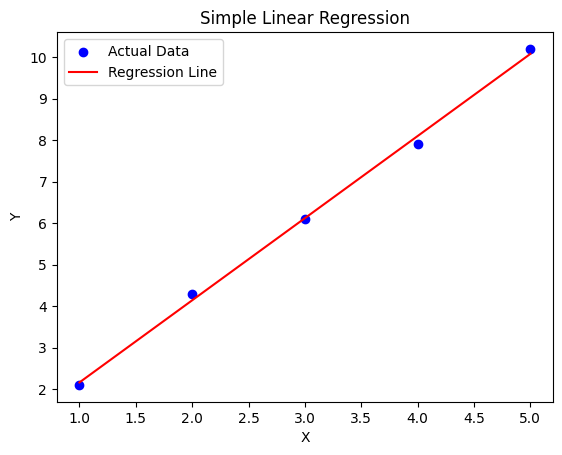

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

print("Slope (Coefficient):", model.coef_)
print("Intercept:", model.intercept_)

plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')

plt.title("Simple Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


#7.  Fit a Multiple Linear Regression model on this sample data:
# ● Area = [1200, 1500, 1800, 2000]
# ● Rooms = [2, 3, 3, 4]
# ● Price = [250000, 300000, 320000, 370000]
# Check for multicollinearity using VIF and report the results.

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}
df = pd.DataFrame(data)
X = df[['Area', 'Rooms']]
Y = df['Price']
model = LinearRegression()
model.fit(X, Y)
print("Intercept:", model.intercept_)
print("Coefficients:",model.coef_)
X_vif = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

print("\nVariance Inflation Factor (VIF) Results:")
print(vif_data)



Intercept: 103157.89473684214
Coefficients: [   63.15789474 34736.84210526]

Variance Inflation Factor (VIF) Results:
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


- Both Area and Rooms have VIF values around 7,
indicating a moderate-to-high level of multicollinearity.
This happens because Area and Rooms increase together — larger houses tend to have more rooms.

# 8 Implement polynomial regression on the following data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
# Fit a 2nd-degree polynomial and plot the resulting curve.

Intercept: 0.06000000000000938
Coefficients: [0.   1.94 0.2 ]


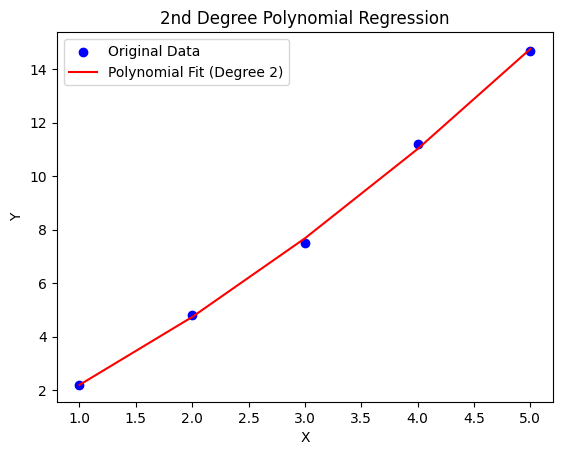

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

Y_pred = model.predict(X_poly)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

plt.scatter(X, Y, color='blue', label='Original Data')
plt.plot(X, Y_pred, color='red', label='Polynomial Fit (Degree 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2nd Degree Polynomial Regression')
plt.legend()
plt.show()


#9  Create a residuals plot for a regression model trained on this data:
# ● X = [10, 20, 30, 40, 50]
# ● Y = [15, 35, 40, 50, 65]
# Assess heteroscedasticity by examining the spread of residuals.

Residuals: [-3.   5.5 -1.  -2.5  1. ]


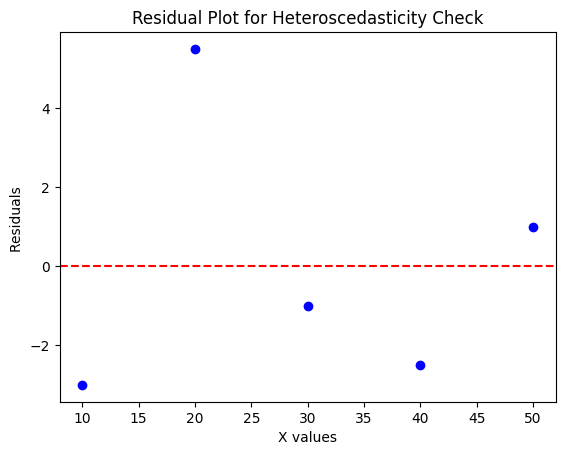

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)
residuals = Y - Y_pred
print("Residuals:", residuals)

plt.scatter(X, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('X values')
plt.ylabel('Residuals ')
plt.title('Residual Plot for Heteroscedasticity Check')
plt.show()


 # Interpretation:
The residual plot shows that the residuals are not evenly scattered around the zero line.
There is a visible pattern and the spread of residuals changes with X.
Hence, the model exhibits heteroscedasticity, indicating that the variance of errors is not constant across all levels of X.

#10 : Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.


- 1 **Address Heteroscedasticity:**
    *   **Transform the Dependent Variable:** Applying a transformation to the dependent variable (House Price) can often stabilize the variance of the errors. Common transformations include taking the logarithm (log transform) or the square root of the price.
    *   **Weighted Least Squares (WLS):** If the form of heteroscedasticity is known, you can use Weighted Least Squares. WLS assigns different weights to each observation based on the variance of its error, giving less weight to observations with higher variance.
    *   **Robust Standard Errors:** This is a more common approach. You can calculate robust standard errors (also known as heteroscedasticity-consistent standard errors) that are not affected by heteroscedasticity. These standard errors are then used for hypothesis testing and confidence intervals, providing valid statistical inferences even in the presence of heteroscedasticity. This is often the preferred method as it doesn't require transforming the data or specifying the form of heteroscedasticity.


2.  **Address Multicollinearity:**
    *   **Remove Highly Correlated Predictors:** If two independent variables are highly correlated, you might consider removing one of them from the model. The decision of which one to remove can be based on domain knowledge, the strength of their individual correlation with the dependent variable, or which one is more theoretically relevant.
    *   **Combine Predictors:** If multiple independent variables are measuring a similar concept, you could combine them into a single variable. For example, if you have highly correlated features like "total square footage" and "living area," you might just use "total square footage."
    *   **Principal Component Analysis (PCA):** PCA is a dimensionality reduction technique that can transform a set of correlated independent variables into a set of uncorrelated principal components. You can then use these principal components as predictors in your regression model.
    *   **Ridge or Lasso Regression:** These are regularization techniques that can handle multicollinearity by adding a penalty term to the regression objective function. Ridge regression shrinks the coefficients towards zero, while Lasso regression can set some coefficients exactly to zero, effectively performing feature selection.